<a href="https://colab.research.google.com/github/ryyhan/RandomCodes/blob/main/LangGraphFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLow #1 - BMI Calc

In [10]:
!pip install langgraph
!pip install langchain
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 11.4 MB/s eta 0:00:00


In [2]:
#imports
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
#state
class BMIState(TypedDict):
  weight_kg : float
  height_m : float
  bmi : float

In [4]:
#BMI calc tool

def calculate_bmi(state: BMIState)-> BMIState:
  weight = state["weight_kg"]
  height = state["height_m"]
  bmi = weight / height**2
  state['bmi'] = bmi
  return state

In [5]:
#graph
graph = StateGraph(BMIState)

#nodes
graph.add_node("calculate_bmi", calculate_bmi)
#edges
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi",END)

#compilation
workflow = graph.compile()

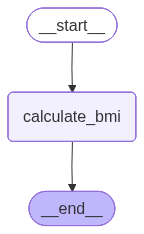

In [6]:
workflow

In [7]:
workflow.invoke({"weight_kg":59, "height_m":1.6})

{'weight_kg': 59, 'height_m': 1.6, 'bmi': 23.046874999999996}

#Flow #2 - BlogGen

In [13]:
#imports
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict

In [14]:
import os
os.environ["GROQ_API_KEY"] = ""

In [17]:
#llm

llm = ChatGroq(
    model="qwen/qwen3-32b",
    temperature=0,
    max_tokens=None,)

In [18]:
#state graph

class BlogState(TypedDict):
  title: str
  outline : str
  content: str

In [20]:
#functions

def generate_outline(state : BlogState) -> BlogState:
  prompt = f"generate an outline for a blog post about {state['title']}"
  outline = llm.invoke(prompt).content
  state['outline'] = outline
  return state

def generate_blog(state: BlogState) -> BlogState:
  prompt = f"generate a blog on the topic {state['title']} with the outline {state['outline']}"
  blog = llm.invoke(prompt).content
  state['content'] = blog
  return state


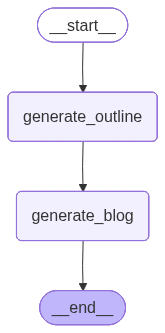

In [22]:
#workflow graph

graph = StateGraph(BlogState)

graph.add_node("generate_outline",generate_outline)
graph.add_node("generate_blog", generate_blog)

graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_blog")
graph.add_edge("generate_blog", END)

graph.compile()

In [23]:
#store workflow
workflow = graph.compile()

In [26]:
workflow.invoke({"title":"Combinig Quantum Computing and Artificial Intelligence"})

{'title': 'Combinig Quantum Computing and Artificial Intelligence',
 'outline': '<think>\nOkay, I need to create an outline for a blog post about combining quantum computing and artificial intelligence. Let me start by thinking about what I know about both fields. Quantum computing uses quantum bits (qubits) that can be in superposition and entangled, which might offer speedups for certain problems. AI, especially machine learning, deals with pattern recognition and data analysis. How do these two areas intersect?\n\nFirst, maybe I should define both fields briefly for readers who aren\'t familiar. Then, explain why combining them is interesting. Perhaps quantum computing can solve problems that are intractable for classical computers, which could help AI algorithms that require massive computations. Or maybe AI can help optimize quantum algorithms or error correction in quantum systems.\n\nI should consider the current state of research. Are there existing projects or papers that comb